<a href="https://colab.research.google.com/github/Ekta-kature/FMMLprojectsandlab/blob/main/MODULE_3_LAB_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **FOUNDATIONS OF MODERN MACHINE LEARNING, IIIT Hyderabad**
### MODULE 3: CLASSIFICATION-1
### LAB-1 : Understanding Distance metrics and Introduction to KNN
#### Module Coordinator: Jashn Arora

---

## **SECTION - 1 : Distance metrics**

In [ ]:
# Importing Required Libraries
import numpy as np
import pandas as pd
import math
from scipy.spatial import distance
import matplotlib.pyplot as plt

### **Euclidean Distance**

In [ ]:

x_1 = np.array((1, 2))
x_2 = np.array((4, 6))

In [ ]:

sumv = 0
for i in range(len(x_1)):
  sumv += ((x_1[i]-x_2[i])**2)
dist = math.sqrt(sumv)
print(dist)

5.0


In [ ]:
#task-01
euclidean_dist = np.linalg.norm(x_1 - x_2)
print(euclidean_dist)

5.0


In [ ]:
euclidean_dist = distance.euclidean(x_1, x_2)
print(euclidean_dist)

5.0


In [ ]:
# 3-D Visualization
plotx = np.linspace(-10,10,50)
meshx, meshy = np.meshgrid(plotx,plotx)

In [ ]:
tempeuclid = np.sqrt((meshx**2 + meshy**2))

In [ ]:
import plotly.graph_objects as go

fig = go.Figure(data=[go.Surface(z=tempeuclid, x=plotx, y=plotx)])
fig.update_layout(title='Euclidean Distance from origin', autosize=False,
                  width=1000, height=1000,
                  margin=dict(l=65, r=50, b=65, t=90))
fig.show()

### **Manhattan Distance**

In [ ]:
manhattan_dist = distance.cityblock(x_1, x_2)
print(manhattan_dist)

7


In [ ]:
manhattan_dist = np.sum(np.abs(x_1 - x_2))

print(manhattan_dist)

7


In [ ]:
# 3-D visualization
plotx = np.linspace(-10,10,50)
meshx, meshy = np.meshgrid(plotx,plotx)

In [ ]:
tempmanhattan = np.abs(meshx) + np.abs(meshy)

In [ ]:
import plotly.graph_objects as go

fig = go.Figure(data=[go.Surface(z=tempmanhattan, x=plotx, y=plotx)])
fig.update_layout(title='Manhattan Distance from origin', autosize=False,
                  width=1000, height=1000,
                  margin=dict(l=65, r=50, b=65, t=90))
fig.show()

### **Minkowski Distance**

In [ ]:
# x_1 = np.array((1, 2))
# x_2 = np.array((4, 6))
minkowski_distance = distance.minkowski(x_1, x_2, p=3)
print("Minkowski distance when p=3 is ",minkowski_distance)

Minkowski distance when p=3 is  4.497941445275415


In [ ]:
# You can verify that this distance is the same as Manhattan dist when p=1,
# and Euclidean dist when p=2

minkowski_dist_p1 = distance.minkowski(x_1,x_2,p=1)
print("Minkowski distance when p=1 is ",minkowski_dist_p1)
minkowski_dist_p2 = distance.minkowski(x_1,x_2,p=2)
print("Minkowski distance when p=2 is ",minkowski_dist_p2)

Minkowski distance when p=1 is  7.0
Minkowski distance when p=2 is  5.0


### **Hamming Distance**

In [ ]:
str_1 = 'euclidean'
str_2 = 'manhattan'
hamming_dist = distance.hamming(list(str_1), list(str_2)) * len(str_1)
print(hamming_dist)

# Note that the answer will be 7, as except for the last two letters ('a' and 'n'), all
# the other corresponding letters in the two strings are different.

7.0


### **Cosine Similarity**

In [ ]:
from numpy.linalg import norm

# x_1 = np.array((1, 2))
# x_2 = np.array((4, 6))

cosine_similarity = 1 - distance.cosine(x_1,x_2)
print(cosine_similarity)

cosine_similarity = np.dot(x_1, x_2)/(norm(x_1)*norm(x_2))
print(cosine_similarity)

0.9922778767136677
0.9922778767136677


### **Chebyshev Distance**

In [ ]:
# x_1 = np.array((1, 2))
# x_2 = np.array((4, 6))

chebyshev_distance = distance.chebyshev(x_1,x_2)
print(chebyshev_distance)

4


# **Jaccard Distance**

In [ ]:
## In the context of binary vectors, let's say:
## a = no. of indices where vector1[i] == 1 == vector2[i]
## b = no. of indices where vector1[i] == 0 and vector2[i] == 1
## c = no. of indices where vector1[i] == 1 and vector2[i] == 0
## d = no. of indices where vector1[i] == 0 == vector2[i]
## Jaccard-distance = 1 - [a/(a+b+c)]

print(distance.jaccard([1, 0, 0], [0, 1, 0]))
print(distance.jaccard([1, 0, 0], [1, 1, 0]))
print(distance.jaccard([1, 0, 0], [1, 1, 1]))

1.0
0.5
0.6666666666666666


In [ ]:
def jaccard_similarity(a, b):
    c = a.intersection(b)
    return float(len(c)) / (len(a) + len(b) - len(c))

list1 = ['dog', 'cat', 'rat']
list2 = ['dog', 'cat', 'mouse', 'rabbit']
# The intersection is ['dog', 'cat']
# union is ['dog', 'cat', 'rat', 'mouse, 'rabbit']
words1 = set(list1)
words2 = set(list2)
print("Jaccard similarity is :",jaccard_similarity(words1, words2))
print("Jaccard distance is :", 1-jaccard_similarity(words1, words2))

Jaccard similarity is : 0.4
Jaccard distance is : 0.6


## **SECTION - 2 : KNN**

### **SECTION - 2.1: KNN on a Synthetic Dataset**

In [ ]:
import random
import scipy.stats as ss
from sklearn.neighbors import KNeighborsClassifier

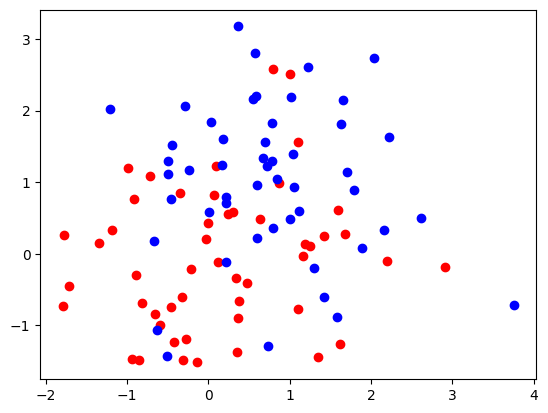

In [ ]:
def generate_synth_data(n = 50):
    points = np.concatenate((ss.norm(0, 1).rvs((n, 2)), ss.norm(1, 1).rvs((n, 2))), axis = 0)
    outcomes = np.concatenate((np.repeat(0, n), np.repeat(1, n)))
    return (points, outcomes)

n = 50
pts,tgts = generate_synth_data(n) #generates 100 points
# print(tgts)
plt.figure()
plt.plot(pts[:n, 0], pts[:n, 1], "ro")
plt.plot(pts[n:, 0], pts[n:, 1], "bo")
plt.show()

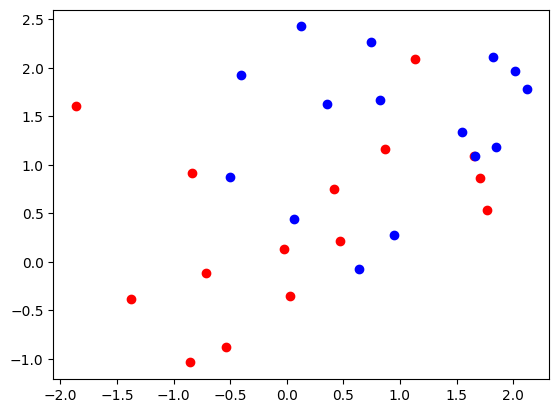

In [ ]:
n = 15
test_pts,test_tgts = generate_synth_data(n)
# print(test_tgts)
plt.figure()
plt.plot(test_pts[:n, 0], test_pts[:n, 1], "ro")
plt.plot(test_pts[n:, 0], test_pts[n:, 1], "bo")
plt.show()

In [36]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
iris = load_iris()
pts = iris.data
tgts = iris.target

# Split the data into a training and testing set
pts_train,pts_test,tgts_train,tgts_test = train_test_split(pts, tgts, test_size=0.2, random_state=42)

# Create a KNN classifier with a specific metric (e.g., 'manhattan')
k = 3  # You mentioned not to change 'k'
metric = 'minkowski'  # You can change this to any distance metric supported by scikit-learn

knn = KNeighborsClassifier(n_neighbors=k, metric=metric)

# Fit the model
knn.fit(pts, tgts)

# Make predictions
y_pred = knn.predict(pts)

# Calculate accuracy
accuracy = accuracy_score(tgts, y_pred)

print(f"Accuracy with {metric} distance metric: {accuracy}")

Accuracy with minkowski distance metric: 0.96


### **SECTION - 2.2: KNN on a Real World dataset**

In [37]:
iris = load_iris()
data = pd.DataFrame(iris.data, columns=iris.feature_names)
# data['species'] = pd.Categorical.from_codes(iris.target, iris.target_names)
data['target'] = pd.Series(iris.target)
data.head(10)

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
5,5.4,3.9,1.7,0.4,0
6,4.6,3.4,1.4,0.3,0
7,5.0,3.4,1.5,0.2,0
8,4.4,2.9,1.4,0.2,0
9,4.9,3.1,1.5,0.1,0


In [39]:
np.random.seed(123)
indices = np.random.permutation(data.shape[0])
div = int(0.65 * len(indices))
train_idx, test_idx = indices[:div], indices[div:]

train_set, test_set = data.loc[train_idx,:], data.loc[test_idx,:]
test_class = list(test_set.iloc[:,-1])
train_class = list(train_set.iloc[:,-1])

In [40]:
def dist_euclidean(X1,X2):
    return distance.euclidean(X1,X2)

In [41]:
def dist_cosine(X1,X2):
    return distance.cosine(X1,X2)

In [42]:
def dist_manhattan(X1,X2):
    return distance.cityblock(X1,X2)

In [43]:
def dist_chebyshev(X1,X2):
    return distance.chebyshev(X1,X2)

In [44]:
metrics_list = [dist_euclidean,dist_cosine, dist_manhattan, dist_chebyshev]
for dist_metric in metrics_list:
  knn = KNeighborsClassifier(n_neighbors = 3, metric=dist_metric)
  knn.fit(train_set, train_class)
  our_predictions = knn.predict(test_set)
  print(dist_metric.__name__)
  print("Prediction Accuracy: ")
  print(100 * np.mean(our_predictions == test_class))
  print()

dist_euclidean
Prediction Accuracy: 
100.0

dist_cosine
Prediction Accuracy: 
100.0

dist_manhattan
Prediction Accuracy: 
100.0

dist_chebyshev
Prediction Accuracy: 
100.0



---
### Questions to Think About and Answer:

## **1**.**How** **are** **similarity** **and** **distance** **different** **from** **each** **other**?
ANS:-
**Distance:**
Distance is a measure of dissimilarity between two data points in a dataset.
It quantifies how far apart or dissimilar two data points are in a feature space.
Common distance metrics include Euclidean distance, Manhattan distance, Chebyshev distance, and more.
Smaller distances indicate that two points are more similar, while larger distances indicate greater dissimilarity.
Distances are typically used for tasks such as clustering, classification, and anomaly detection.
Distance is used to calculate the "closeness" or "dissimilarity" between data points and is a measure of their separation in the feature space.

**Similarity:**
Similarity is a measure of how alike or similar two data points are in a dataset.
It quantifies the degree of resemblance between two data points, often focusing on shared characteristics or features.
Common similarity metrics include cosine similarity, Jaccard similarity, Pearson correlation, and more.
Larger similarity values indicate that two points are more similar, while smaller values suggest dissimilarity.
Similarity is used to find relationships, associations, and patterns in data.
It is used in recommendation systems, information retrieval, and finding similar items or documents.

## **2.Are there any conditions for a particular distance to be considered a "distance metric"?**

ANS:-Yes, there are several conditions that a function must satisfy to be considered a "distance metric" in mathematics and in the context of machine learning. A distance metric is a function that quantifies the dissimilarity between two data points or objects. To be considered a valid distance metric, it must satisfy the following conditions:

1.Non-negativity: The distance between any two points should be non-negative. Formally, for all points x and y, the distance function d(x, y) should satisfy: d(x, y) ≥ 0.

2.Identity of indiscernibles: The distance between two points is zero if and only if the two points are identical. Formally, for all points x and y, d(x, y) = 0 if and only if x = y.

3.Symmetry: The distance from point x to point y should be the same as the distance from point y to point x. Formally, for all points x and y, d(x, y) = d(y, x).

4.Triangle Inequality: The distance between any two points in a dataset should satisfy the triangle inequality. Formally, for all points x, y, and z, d(x, y) + d(y, z) ≥ d(x, z).

5.Positive definiteness: In the context of machine learning, a distance metric should satisfy positive definiteness, which means that the distance is non-negative and is equal to zero only when the two data points are the same.

In addition to these basic properties, different distance metrics may have specific conditions or properties that make them suitable for particular applications. For example, the Euclidean distance is a valid distance metric that satisfies these properties and is commonly used in many machine learning algorithms. However, different applications and data types may require distance metrics with specific properties, such as the cosine similarity for text data or the Jaccard similarity for set data.

It's important to choose a distance metric that is appropriate for your specific problem and data characteristics while ensuring that it satisfies the fundamental properties of a distance metric.

